## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.643886 -0.406596 -1.070559 -0.283275 -0.430813  0.081674
1 -0.566966  1.543094  0.571056  1.574731 -1.725119  0.820957
2 -1.736352  1.338474  1.340323  1.234625 -0.645554 -0.295980
3  1.575229 -1.429834  1.605961  0.220928  1.668255  0.645742
4  1.269187 -0.285585 -0.998714 -0.803449 -1.026095 -0.057484


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9465658	total: 58.1ms	remaining: 58s
1:	learn: 0.9380887	total: 58.6ms	remaining: 29.2s
2:	learn: 0.9284583	total: 59.1ms	remaining: 19.6s
3:	learn: 0.9195703	total: 59.6ms	remaining: 14.8s
4:	learn: 0.9097855	total: 60.2ms	remaining: 12s
5:	learn: 0.9004533	total: 60.9ms	remaining: 10.1s
6:	learn: 0.8892241	total: 61.3ms	remaining: 8.7s
7:	learn: 0.8805781	total: 61.8ms	remaining: 7.66s
8:	learn: 0.8733312	total: 62.2ms	remaining: 6.85s
9:	learn: 0.8648830	total: 62.9ms	remaining: 6.23s
10:	learn: 0.8547993	total: 63.3ms	remaining: 5.69s
11:	learn: 0.8453497	total: 63.8ms	remaining: 5.25s
12:	learn: 0.8369943	total: 64.3ms	remaining: 4.88s
13:	learn: 0.8276878	total: 64.8ms	remaining: 4.57s
14:	learn: 0.8198086	total: 65.2ms	remaining: 4.28s
15:	learn: 0.8127302	total: 65.8ms	remaining: 4.04s
16:	learn: 0.8044831	total: 66.3ms	remaining: 3.83s
17:	learn: 0.7977457	total: 66.8ms	remaining: 3.64s
18:	learn: 0.7901279	total: 67.4ms	remaining: 3.4

108:	learn: 0.3726168	total: 112ms	remaining: 916ms
109:	learn: 0.3697652	total: 112ms	remaining: 910ms
110:	learn: 0.3669949	total: 113ms	remaining: 904ms
111:	learn: 0.3642501	total: 113ms	remaining: 898ms
112:	learn: 0.3617147	total: 114ms	remaining: 892ms
113:	learn: 0.3591485	total: 114ms	remaining: 887ms
114:	learn: 0.3562651	total: 115ms	remaining: 882ms
115:	learn: 0.3533967	total: 115ms	remaining: 876ms
116:	learn: 0.3508338	total: 115ms	remaining: 872ms
117:	learn: 0.3479591	total: 116ms	remaining: 867ms
118:	learn: 0.3455262	total: 116ms	remaining: 862ms
119:	learn: 0.3428288	total: 117ms	remaining: 857ms
120:	learn: 0.3403503	total: 117ms	remaining: 853ms
121:	learn: 0.3383696	total: 118ms	remaining: 848ms
122:	learn: 0.3359799	total: 118ms	remaining: 844ms
123:	learn: 0.3337387	total: 119ms	remaining: 839ms
124:	learn: 0.3315262	total: 119ms	remaining: 835ms
125:	learn: 0.3290061	total: 120ms	remaining: 831ms
126:	learn: 0.3267483	total: 120ms	remaining: 827ms
127:	learn: 

269:	learn: 0.1304107	total: 187ms	remaining: 504ms
270:	learn: 0.1295756	total: 187ms	remaining: 503ms
271:	learn: 0.1286472	total: 188ms	remaining: 502ms
272:	learn: 0.1277774	total: 188ms	remaining: 501ms
273:	learn: 0.1267827	total: 189ms	remaining: 500ms
274:	learn: 0.1259708	total: 189ms	remaining: 498ms
275:	learn: 0.1251905	total: 190ms	remaining: 497ms
276:	learn: 0.1243396	total: 190ms	remaining: 496ms
277:	learn: 0.1237812	total: 190ms	remaining: 495ms
278:	learn: 0.1231760	total: 191ms	remaining: 493ms
279:	learn: 0.1226768	total: 191ms	remaining: 492ms
280:	learn: 0.1218715	total: 192ms	remaining: 491ms
281:	learn: 0.1212801	total: 192ms	remaining: 490ms
282:	learn: 0.1204634	total: 193ms	remaining: 488ms
283:	learn: 0.1196904	total: 193ms	remaining: 487ms
284:	learn: 0.1190024	total: 194ms	remaining: 486ms
285:	learn: 0.1182098	total: 194ms	remaining: 485ms
286:	learn: 0.1174907	total: 194ms	remaining: 483ms
287:	learn: 0.1167924	total: 195ms	remaining: 482ms
288:	learn: 

494:	learn: 0.0388412	total: 295ms	remaining: 301ms
495:	learn: 0.0386639	total: 296ms	remaining: 301ms
496:	learn: 0.0385316	total: 296ms	remaining: 300ms
497:	learn: 0.0383293	total: 297ms	remaining: 299ms
498:	learn: 0.0382001	total: 297ms	remaining: 298ms
499:	learn: 0.0379953	total: 298ms	remaining: 298ms
500:	learn: 0.0378691	total: 298ms	remaining: 297ms
501:	learn: 0.0377358	total: 298ms	remaining: 296ms
502:	learn: 0.0375508	total: 299ms	remaining: 295ms
503:	learn: 0.0373813	total: 299ms	remaining: 295ms
504:	learn: 0.0372013	total: 300ms	remaining: 294ms
505:	learn: 0.0370229	total: 300ms	remaining: 293ms
506:	learn: 0.0368936	total: 301ms	remaining: 293ms
507:	learn: 0.0367719	total: 301ms	remaining: 292ms
508:	learn: 0.0366070	total: 302ms	remaining: 291ms
509:	learn: 0.0363841	total: 302ms	remaining: 291ms
510:	learn: 0.0362430	total: 303ms	remaining: 290ms
511:	learn: 0.0361041	total: 303ms	remaining: 289ms
512:	learn: 0.0359824	total: 304ms	remaining: 289ms
513:	learn: 

645:	learn: 0.0222116	total: 371ms	remaining: 203ms
646:	learn: 0.0221121	total: 371ms	remaining: 202ms
647:	learn: 0.0220110	total: 372ms	remaining: 202ms
648:	learn: 0.0219083	total: 372ms	remaining: 201ms
649:	learn: 0.0218536	total: 373ms	remaining: 201ms
650:	learn: 0.0217985	total: 373ms	remaining: 200ms
651:	learn: 0.0216955	total: 373ms	remaining: 199ms
652:	learn: 0.0216532	total: 374ms	remaining: 199ms
653:	learn: 0.0216119	total: 375ms	remaining: 198ms
654:	learn: 0.0215586	total: 375ms	remaining: 197ms
655:	learn: 0.0214224	total: 375ms	remaining: 197ms
656:	learn: 0.0213278	total: 376ms	remaining: 196ms
657:	learn: 0.0212317	total: 376ms	remaining: 196ms
658:	learn: 0.0210993	total: 377ms	remaining: 195ms
659:	learn: 0.0210100	total: 377ms	remaining: 194ms
660:	learn: 0.0209168	total: 378ms	remaining: 194ms
661:	learn: 0.0208367	total: 378ms	remaining: 193ms
662:	learn: 0.0207971	total: 379ms	remaining: 192ms
663:	learn: 0.0207024	total: 379ms	remaining: 192ms
664:	learn: 

865:	learn: 0.0113516	total: 480ms	remaining: 74.2ms
866:	learn: 0.0113023	total: 480ms	remaining: 73.7ms
867:	learn: 0.0112854	total: 481ms	remaining: 73.1ms
868:	learn: 0.0112341	total: 481ms	remaining: 72.5ms
869:	learn: 0.0112176	total: 482ms	remaining: 72ms
870:	learn: 0.0111749	total: 482ms	remaining: 71.4ms
871:	learn: 0.0111218	total: 483ms	remaining: 70.8ms
872:	learn: 0.0110927	total: 483ms	remaining: 70.3ms
873:	learn: 0.0110433	total: 483ms	remaining: 69.7ms
874:	learn: 0.0109916	total: 484ms	remaining: 69.1ms
875:	learn: 0.0109633	total: 484ms	remaining: 68.6ms
876:	learn: 0.0109356	total: 485ms	remaining: 68ms
877:	learn: 0.0108893	total: 485ms	remaining: 67.4ms
878:	learn: 0.0108734	total: 486ms	remaining: 66.9ms
879:	learn: 0.0108189	total: 486ms	remaining: 66.3ms
880:	learn: 0.0107654	total: 487ms	remaining: 65.7ms
881:	learn: 0.0107184	total: 487ms	remaining: 65.2ms
882:	learn: 0.0107038	total: 487ms	remaining: 64.6ms
883:	learn: 0.0106635	total: 488ms	remaining: 64ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

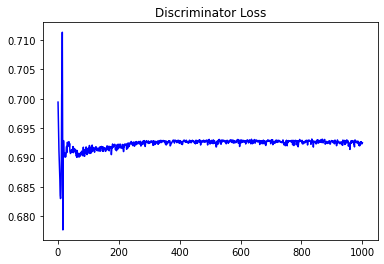

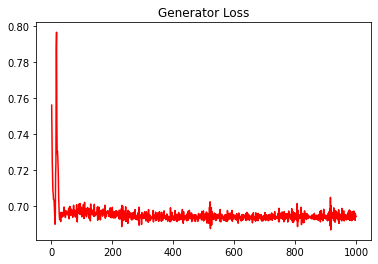

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.02223922690299746


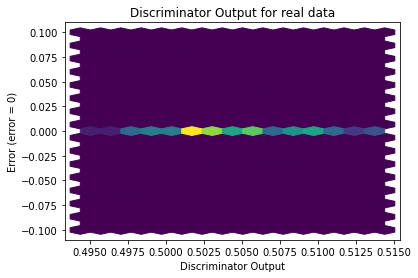

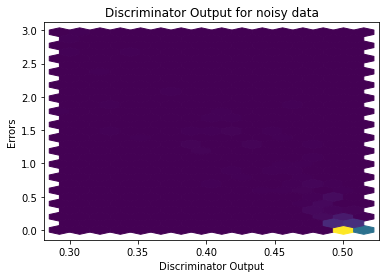

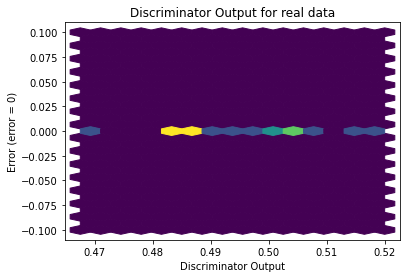

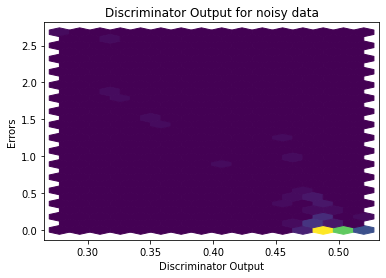

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


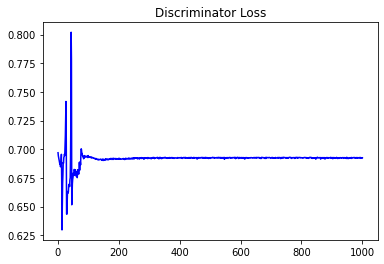

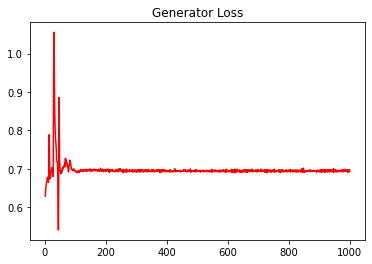

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.016869721922027806


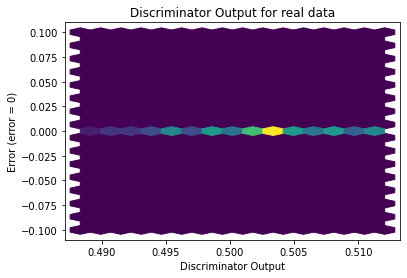

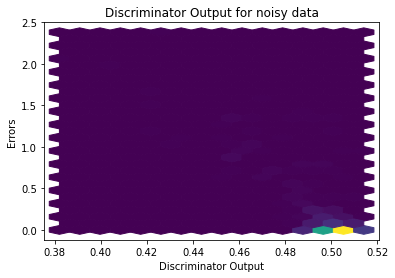

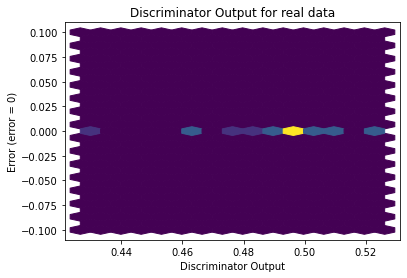

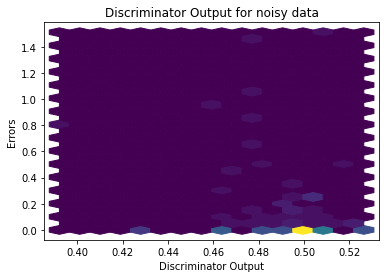

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6972]], requires_grad=True)
